In [13]:
'''
ResNet18: 使用预训练的 ResNet18 模型。
反卷积层: 使用 nn.ConvTranspose2d 对特征图进行上采样。
可视化: 将反卷积后的特征图转换为图像格式并显示。
'''

'\nResNet18: 使用预训练的 ResNet18 模型。\n反卷积层: 使用 nn.ConvTranspose2d 对特征图进行上采样。\n可视化: 将反卷积后的特征图转换为图像格式并显示。\n'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.5282745..2.4011166].


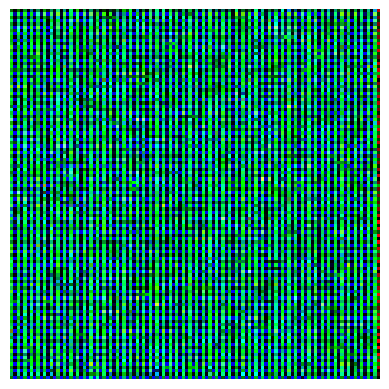

In [14]:
import torch
import torch.nn as nn
import torchvision.models as models
import matplotlib.pyplot as plt
# 加载预训练的 ResNet18 模型
resnet18 = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)

# 设置为评估模式
resnet18.eval()
# 定义反卷积层
deconv_layer = nn.ConvTranspose2d(in_channels=64, out_channels=3, kernel_size=3, stride=2, padding=1, output_padding=1)
# 创建一个随机输入张量（假设输入图像为 3x224x224）
input_tensor = torch.randn(1, 3, 224, 224)


# 获取 ResNet18 的第一个卷积层输出
with torch.no_grad():
    features = resnet18.conv1(input_tensor)
    features = resnet18.bn1(features)
    features = resnet18.relu(features)
    features = resnet18.maxpool(features)

# 使用反卷积层对特征图进行上采样
deconv_output = deconv_layer(features)

# 将反卷积结果转换为图像格式
output_image = deconv_output.squeeze().permute(1, 2, 0).detach().numpy()

# 可视化结果
plt.imshow(output_image)
plt.axis('off')
plt.show()

In [10]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

# 1. 加载预训练的 ResNet18 模型
resnet18 = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
resnet18.eval()

# 2. 定义反卷积层
deconv_layer = nn.ConvTranspose2d(in_channels=64, out_channels=3, kernel_size=3, stride=2, padding=1, output_padding=1)

# 3. 读取并预处理图片
def load_image(image_path):
    # 打开图片
    image = Image.open(image_path).convert('RGB')  # 确保图片是 RGB 格式
    # 定义预处理步骤
    preprocess = transforms.Compose([
        transforms.Resize((224, 224)),  # 调整图片大小为 224x224
        transforms.ToTensor(),           # 转换为 PyTorch 张量
        transforms.Normalize(            # 标准化
            mean=[0.485, 0.456, 0.406], # ImageNet 均值
            std=[0.229, 0.224, 0.225]    # ImageNet 标准差
        )
    ])
    # 对图片进行预处理
    input_tensor = preprocess(image)
    input_tensor = input_tensor.unsqueeze(0)  # 添加 batch 维度
    return input_tensor, image

# 4. 加载图片
image_path = 'SAM/pic/suqi.jpg'  # 替换为你的图片路径
input_tensor, original_image = load_image(image_path)

# 5. 前向传播并获取特征图
with torch.no_grad():
    features = resnet18.conv1(input_tensor)
    features = resnet18.bn1(features)
    features = resnet18.relu(features)
    features = resnet18.maxpool(features)

# 6. 使用反卷积层对特征图进行上采样
deconv_output = deconv_layer(features)

# 7. 将反卷积结果转换为图像格式
def deprocess_image(tensor):
    # 移除 batch 维度并转换为 numpy 数组
    tensor = tensor.squeeze(0).permute(1, 2, 0).detach().numpy()
    # 反标准化
    tensor = tensor * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]
    # 将值限制在 [0, 1] 范围内
    tensor = tensor.clip(0, 1)
    return tensor

output_image = deprocess_image(deconv_output)

# 8. 可视化结果
plt.figure(figsize=(10, 5))

# 显示原始图片
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

# 显示反卷积结果
plt.subplot(1, 2, 2)
plt.imshow(output_image)
plt.title('Deconvolution Output')
plt.axis('off')
plt.imsave("SAM/pic/suqi-deconv.png",output_image)

plt.show()